In [2]:
from __future__ import division
from numpy import *
%pylab inline
from mpl_toolkits.mplot3d.axes3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


-64001.0 64511.0


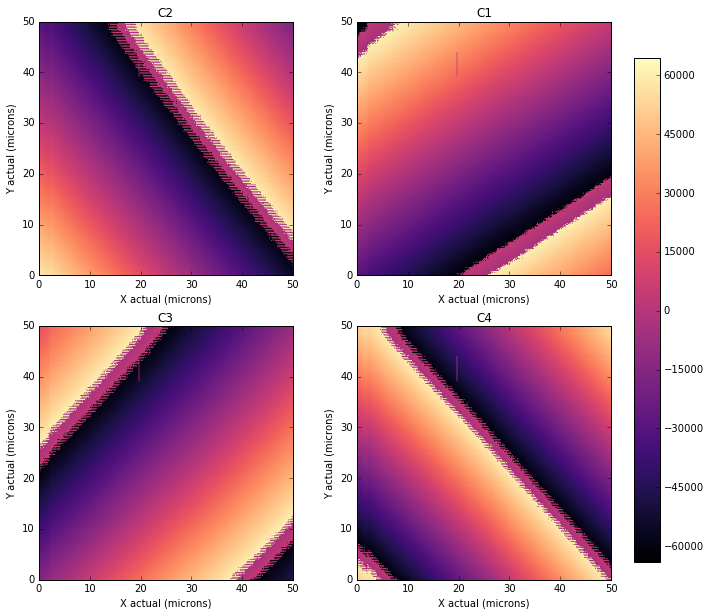

In [12]:
hall_readings = load('hall_readings_300um_8th_320x320.npy')#[1:,1:]
Nx,Ny,_ = shape(hall_readings)
#order from AS5013 datasheet: C4, C3, C2, C1, C5
# C2 - XX - C1
# XX - C5 - XX
# C3 - XX - C4
step = .156 #um
N_hall = 4
fig,axarr = subplots(2,2,figsize=(12,10))
inds = [[2,3],[1,0]]
labels = [['C2','C1'],['C3','C4']]
vmax,vmin = amax(hall_readings),amin(hall_readings)
print vmin,vmax
for i in range(2):
    for j in range(2):
        im = axarr[i,j].imshow(hall_readings[...,inds[i][j]],extent=(0,Nx*step,0,Ny*step),vmax=vmax,vmin=vmin,cmap=plt.get_cmap('magma'))
        axarr[i,j].set_title(labels[i][j])
        axarr[i,j].set_xlabel("X actual (microns)")
        axarr[i,j].set_ylabel("Y actual (microns)")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.03, 0.7])
fig.colorbar(im, cax=cbar_ax)
#fig.colorbar(cax)

200 200
1007.68335359
Standard Deviation (y): 0.115 microns
Standard Deviation (x): 0.133 microns


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:31: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:32: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


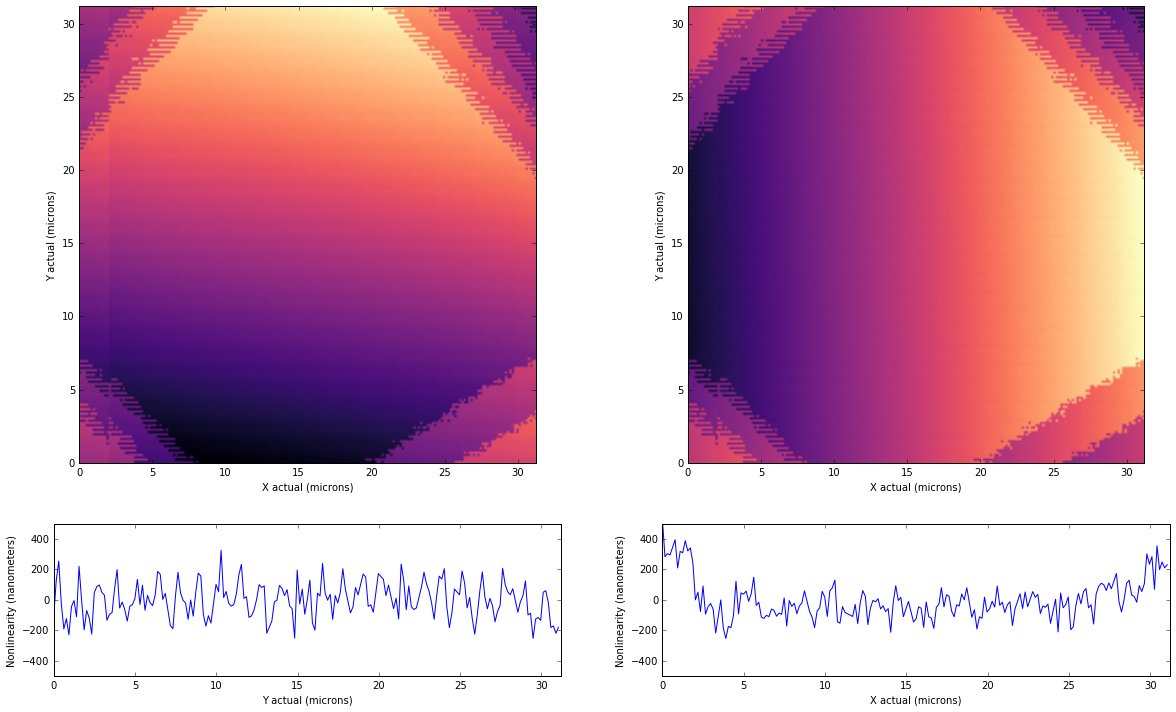

In [97]:
subregion = hall_readings[120:,:200]
Nx,Ny,_ = shape(subregion)
print Nx,Ny
fig,axarr = subplots(2,2,figsize=(20,12),gridspec_kw = {'height_ratios':[3, 1]})
# X = C1 - C2 + C4 - C3
# Y = C3 - C2 + C4 - C1
data = subregion[...,inds[0][1]] - subregion[...,inds[0][0]] + subregion[...,inds[1][1]] - subregion[...,inds[1][0]]
vmax,vmin = amax(data),amin(data)
im = axarr[0,0].imshow(data,extent=(0,Ny*step,0,Nx*step),vmax=vmax,vmin=vmin,cmap=plt.get_cmap('magma'))
data2 = subregion[...,inds[1][0]] - subregion[...,inds[0][0]] + subregion[...,inds[1][1]] - subregion[...,inds[0][1]]
im = axarr[0,1].imshow(data2,extent=(0,Ny*step,0,Nx*step),vmax=vmax,vmin=vmin,cmap=plt.get_cmap('magma'))
axarr[0,0].set_xlabel("X actual (microns)")
axarr[0,0].set_ylabel("Y actual (microns)")
axarr[0,1].set_xlabel("X actual (microns)")
axarr[0,1].set_ylabel("Y actual (microns)")


#axarr[1,0].plot(arange(0,Ny*step,step),data[:,Nx/2])
yline = polyfit(arange(0,Ny*step,step),data[:,Nx/2],1)
ydev = data[:,Nx/2] - (yline[0]*arange(0,Ny*step,step) + yline[1])
axarr[1,0].plot(arange(0,Ny*step,step),1000*ydev/abs(yline[0]) )
print std(ydev)
print "Standard Deviation (y): %.3f microns"%(std(ydev)/abs(yline[0]))
axarr[1,0].set_xlabel("Y actual (microns)")
axarr[1,0].set_ylabel("Nonlinearity (nanometers)")
axarr[1,0].set_xlim([0,Ny*step])
axarr[1,0].set_ylim([-500,500])


#axarr[1,1].plot(arange(0,Nx*step,step),data2[Ny/2,:])
xline = polyfit(arange(0,Nx*step,step),data2[Ny/2,:],1)
xdev = data2[Ny/2,:] - (xline[0]*arange(0,Nx*step,step) + xline[1])
axarr[1,1].plot(arange(0,Nx*step,step),1000*xdev/abs(xline[0]) )
axarr[1,1].set_xlabel("X actual (microns)")
axarr[1,1].set_ylabel("Nonlinearity (nanometers)")
axarr[1,1].set_xlim([0,Nx*step])
axarr[1,1].set_ylim([-500,500])

print "Standard Deviation (x): %.3f microns"%(std(xdev)/abs(xline[0]))


#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.82, 0.15, 0.03, 0.7])
#axarr[0,0].colorbar(im, cax=cbar_ax)

In [5]:
hall_readings_conc = load('hall_readings_concentric.npy')#[1:,1:]
hall_readings_sing = load('hall_readings_100x100.npy')#[1:,1:]
#print shape(hall_readings)

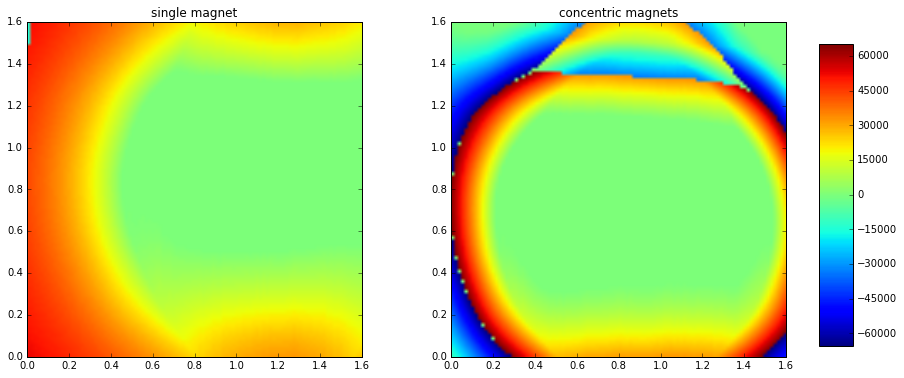

In [13]:
Nx = 80
Ny = 80
step = 20 #um
N_hall = 5
fig,axarr = subplots(1,2,figsize=(16,6))
labels = ['C4','C3','C2','C1','C5']
vmax,vmin = amax(hall_readings_conc),amin(hall_readings_conc)
im = axarr[0].imshow(hall_readings_sing[...,i],extent=(0,Nx*step/1000,0,Ny*step/1000),vmax=vmax,vmin=vmin)
axarr[0].set_title('single magnet')
im = axarr[1].imshow(hall_readings_conc[...,i],extent=(0,Nx*step/1000,0,Ny*step/1000),vmax=vmax,vmin=vmin)
axarr[1].set_title('concentric magnets')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.03, 0.7])
fig.colorbar(im, cax=cbar_ax)
#fig.colorbar(cax)

-65408.0 65408.0


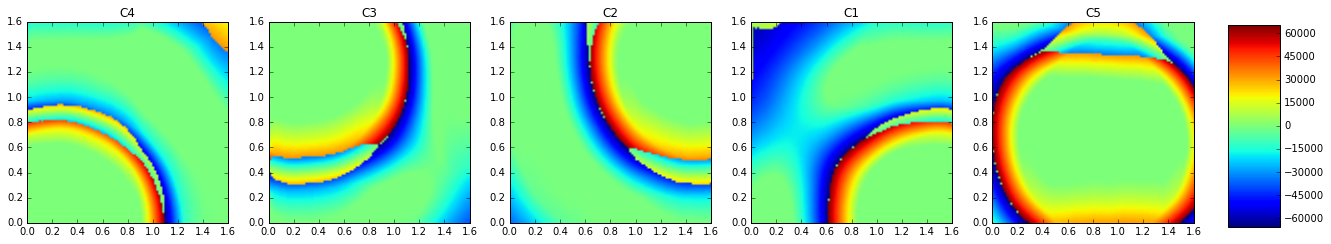

In [4]:
#order from AS5013 datasheet: C4, C3, C2, C1, C5
# C2 - XX - C1
# XX - C5 - XX
# C3 - XX - C4
Nx = 80
Ny = 80
step = 20 #um
#X = arange(0, Nx*step, step)
#Y = arange(0, Ny*step, step)
#X,Y = meshgrid(X,Y)
N_hall = 5
fig,axarr = subplots(1,N_hall,figsize=(24,4))
labels = ['C4','C3','C2','C1','C5']
vmax,vmin = amax(hall_readings),amin(hall_readings)
print vmin,vmax
for i in range(N_hall):
    im = axarr[i].imshow(hall_readings[...,i],extent=(0,Nx*step/1000,0,Ny*step/1000),vmax=vmax,vmin=vmin)
    axarr[i].set_title(labels[i])
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.03, 0.7])
fig.colorbar(im, cax=cbar_ax)
#fig.colorbar(cax)

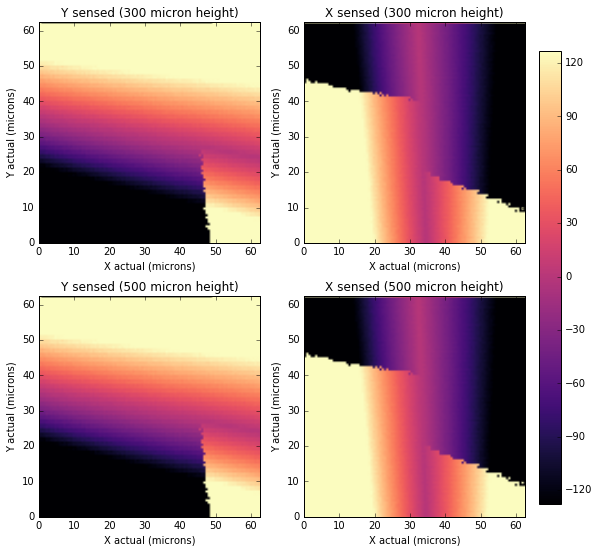

In [54]:
xy_readings_300 = load('xy_readings_300um.npy')#[1:,1:]
xy_readings_500 = load('xy_readings_500um.npy')#[1:,1:]
Nx,Ny,_ = shape(xy_readings_300)
step = .625 #um -- make sure to check this.
N_hall = 5
fig,axarr = subplots(2,2,figsize=(10,9))
vmax,vmin = 127,-128 #amax(xy_readings_300),amin(xy_readings_300)
im = axarr[0,0].imshow(xy_readings_300[...,0],extent=(0,Nx*step,0,Ny*step),vmax=vmax,vmin=vmin,cmap=plt.get_cmap('magma'))
im = axarr[0,1].imshow(xy_readings_300[...,1],extent=(0,Nx*step,0,Ny*step),vmax=vmax,vmin=vmin,cmap=plt.get_cmap('magma'))
im = axarr[1,0].imshow(xy_readings_500[...,0],extent=(0,Nx*step,0,Ny*step),vmax=vmax,vmin=vmin,cmap=plt.get_cmap('magma'))
im = axarr[1,1].imshow(xy_readings_500[...,1],extent=(0,Nx*step,0,Ny*step),vmax=vmax,vmin=vmin,cmap=plt.get_cmap('magma'))
axarr[0,0].set_title('Y sensed (300 micron height)')
axarr[0,1].set_title('X sensed (300 micron height)')
axarr[1,0].set_title('Y sensed (500 micron height)')
axarr[1,1].set_title('X sensed (500 micron height)')
for axs in axarr:
    for ax in axs:
        ax.set_xlabel('X actual (microns)')
        ax.set_ylabel('Y actual (microns)')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.03, 0.7])
fig.colorbar(im, cax=cbar_ax)
#fig.colorbar(cax)

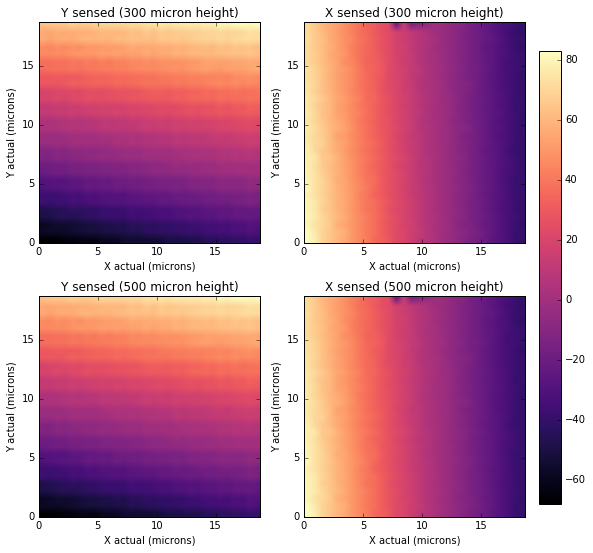

In [55]:
xy_readings_300 = load('xy_readings_300um.npy')[35:65,35:65]
xy_readings_500 = load('xy_readings_300um.npy')[35:65,35:65]
Nx,Ny,_ = shape(xy_readings_300)
#Nx = 100
#Ny = 100
step = .625 #um
N_hall = 5
fig,axarr = subplots(2,2,figsize=(10,9))
vmax,vmin = amax(xy_readings_300),amin(xy_readings_300)
im = axarr[0,0].imshow(xy_readings_300[...,0],extent=(0,Nx*step,0,Ny*step),vmax=vmax,vmin=vmin,cmap=plt.get_cmap('magma'))
im = axarr[0,1].imshow(xy_readings_300[...,1],extent=(0,Nx*step,0,Ny*step),vmax=vmax,vmin=vmin,cmap=plt.get_cmap('magma'))
im = axarr[1,0].imshow(xy_readings_500[...,0],extent=(0,Nx*step,0,Ny*step),vmax=vmax,vmin=vmin,cmap=plt.get_cmap('magma'))
im = axarr[1,1].imshow(xy_readings_500[...,1],extent=(0,Nx*step,0,Ny*step),vmax=vmax,vmin=vmin,cmap=plt.get_cmap('magma'))
axarr[0,0].set_title('Y sensed (300 micron height)')
axarr[0,1].set_title('X sensed (300 micron height)')
axarr[1,0].set_title('Y sensed (500 micron height)')
axarr[1,1].set_title('X sensed (500 micron height)')
for axs in axarr:
    for ax in axs:
        ax.set_xlabel('X actual (microns)')
        ax.set_ylabel('Y actual (microns)')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.03, 0.7])
fig.colorbar(im, cax=cbar_ax)
#fig.colorbar(cax)

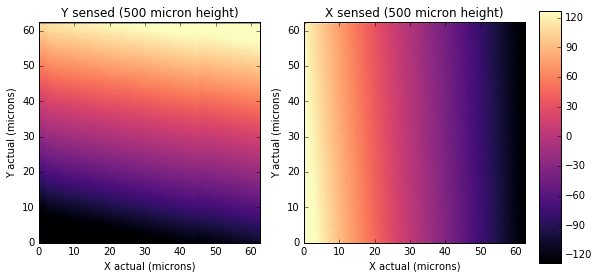

In [62]:
xy_readings_500 = load('xy_readings_500um_2x.npy')#[1:,1:]
Nx,Ny,_ = shape(xy_readings_500)
step = .625 #um
N_hall = 5
fig,axarr = subplots(1,2,figsize=(10,5))
vmax,vmin = 127,-128 #amax(xy_readings_300),amin(xy_readings_300)
im = axarr[0].imshow(xy_readings_500[...,0],extent=(0,Nx*step,0,Ny*step),vmax=vmax,vmin=vmin,cmap=plt.get_cmap('magma'))
im = axarr[1].imshow(xy_readings_500[...,1],extent=(0,Nx*step,0,Ny*step),vmax=vmax,vmin=vmin,cmap=plt.get_cmap('magma'))
axarr[0].set_title('Y sensed (500 micron height)')
axarr[1].set_title('X sensed (500 micron height)')
for ax in axarr:
    ax.set_xlabel('X actual (microns)')
    ax.set_ylabel('Y actual (microns)')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.03, 0.7])
fig.colorbar(im, cax=cbar_ax)
#fig.colorbar(cax)

58000.0 42912.0


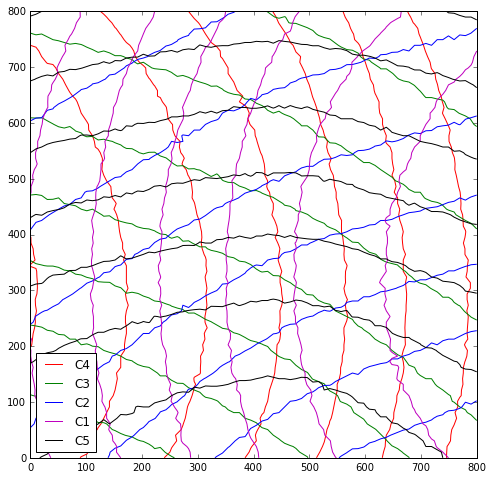

In [112]:
#order from AS5013 datasheet: C4, C3, C2, C1, C5
# C2 - XX - C1
# XX - C5 - XX
# C3 - XX - C4
Nx = 80
Ny = 80
step = 10 #um
X = arange(0, Nx*step, step)
Y = arange(0, Ny*step, step)
X,Y = meshgrid(X,Y)
N_hall = 5
labels = ['C4','C3','C2','C1','C5']
colors = ['r','g','b','m','k']
#coords = [(2,2),(2,0),(0,0),(0,2),(1,1)]
fig = figure(figsize=(8,8))
vmax,vmin = amax(hall_readings),amin(hall_readings)
print vmax,vmin
conts = [
    contour(hall_readings[...,i],extent=(0,Nx*step,0,Ny*step),colors=colors[i]) 
    #contour(hall_readings[...,i],[-60000,-40000,-10000,-1000,0,1000,10000,40000,60000],extent=(0,Nx*step,0,Ny*step),colors=colors[i]) 
    for i in range(N_hall)]
conts = [ c.collections[1] for c in conts]
legend(conts, labels,loc='lower left')

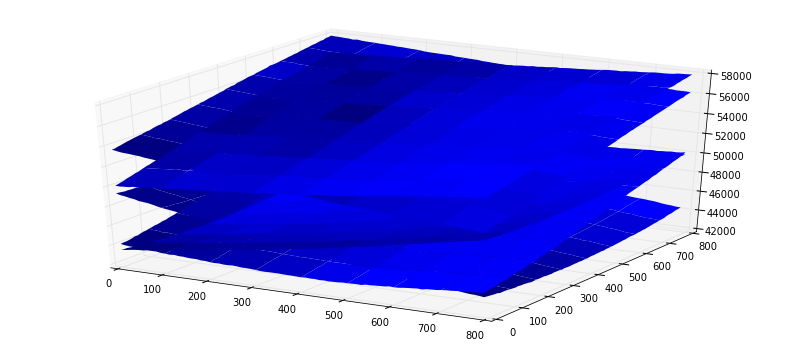

In [113]:
X = arange(0, Nx*step, step)
Y = arange(0, Ny*step, step)
X,Y = meshgrid(X,Y)
fig = plt.figure(figsize=(14,6))
ax = fig.gca(projection='3d')
for i in range(N_hall):
    p = ax.plot_surface(X, Y, hall_readings[...,i], linewidth=0)

# surface_plot with color grading and color bar
#ax = fig.add_subplot(1, 2, 2, projection='3d')
#p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
#cb = fig.colorbar(p, shrink=0.5)